# 最小二乘

## 1 生成数据

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(0, 10, 100)

In [3]:
y = [2*x + 6 for x in X]

In [4]:
Y = [np.random.normal(z, 2.8) for z in y]

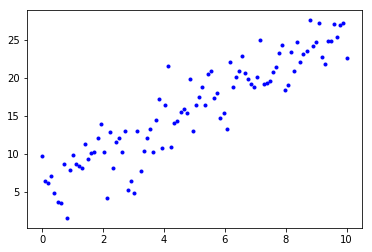

In [5]:
plt.plot(X, Y, 'b.')

## 2 解方程求解

### 解得结果：
$a=\frac{n\sum_{i=1}^{n}x_{i}y_{i} -\sum_{i=1}^{n}x_{i}\sum_{i=1}^{n}y_{i}}{n\sum_{i=1}^{n}x_{i}^{2}-(\sum_{i=1}^{n}x_{i})^{2} }$

$b=\frac{\sum_{i=1}^{n}x_{i}^{2}\sum_{i=1}^{n}y_{i} - \sum_{i=1}^{n}x_{i}\sum_{i=1}^{n}x_{i}y_{i}}{n\sum_{i=1}^{n}x_{i}^{2} - (\sum_{i=1}^{n}x_{i})^2}$

In [6]:
# 直接求a, b
def least_square(x, y):
    sumxy = sum(x*y)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x**2)
    n = len(x)
    a = (n*sumxy - sumx*sumy) / (n*sumx2 -sumx**2)
    b = (sumx2*sumy - sumx*sumxy)/(n*sumx2 - sumx**2)
    return b, a

In [7]:
b, a = least_square(X, Y)

In [8]:
print(b, a)

5.494923711017665 2.087263029384611


In [9]:
Y_ = [a*x + b for x in X]

Text(0.5, 1.0, 'y=2.087263029384611+5.494923711017665x')

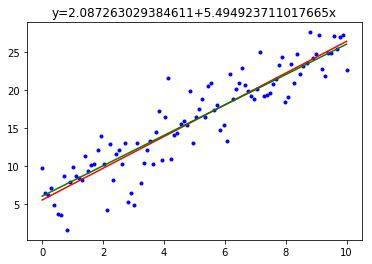

In [10]:
plt.plot(X, Y, 'b.')
plt.plot(X, Y_, 'r')
plt.plot(X, y, 'g')
plt.title("y={}+{}x".format(a,b))

## 3 线性代数法（解矩阵方程）
$X = (A^{T}A)^{-1}A^{T}b$

求解 $Ax=b$
往往是知道x和b反求A

In [11]:
G = np.mat([X, [1 for i in range(len(X))]]).T
b = np.mat(Y).T
ret_x = (G.T*G).I*G.T*b
ret_x

matrix([[2.08726303],
        [5.49492371]])